# Home Credit Default Risk - Kaggle Competition

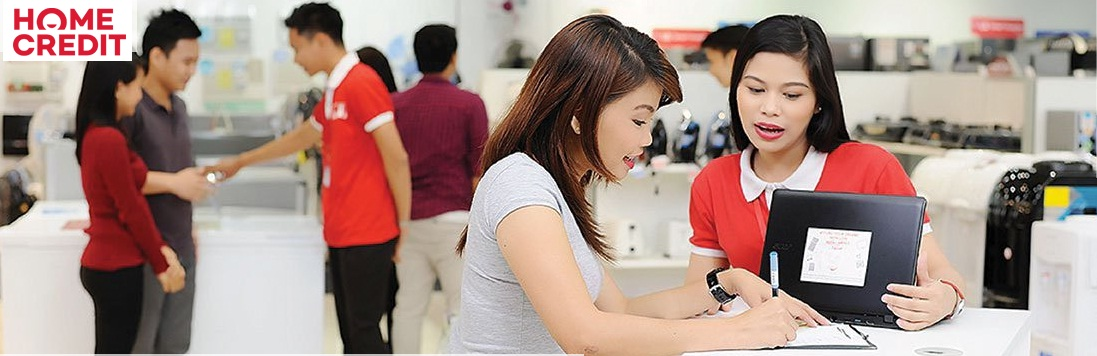

In [102]:
from IPython.display import Image
Image('Home_Credit.jpg')

## Table of Contents

1. [Loading Libraries](#lib)
2. [Data Description](#data)
3. [Loading Dataset Files](#files)
4. [Exploratory Data Analysis - EDA](#eda)  
    4.1 [Evaluating Train Dataset](#train)   
    4.2 [Evaluating Bureau Dataset](#bureau)  
    4.3 [Evaluating Previous_Application Dataset](#previous_application)  
    4.4 [Evaluating Instalment_Payment Dataset](#instalment)   
    4.5 [Evaluating Credit_Card_Balance Dataset](#credit_card)   
    4.6 [Evaluating Pos_Cash_Balance Dataset](#cash_balance)   
5. [Feature Engineering](#eng)
6. [Missing Values](#missing)
7. [Dimensionality Reduction - Primary Component Analysis - PCA](#pca)
8. [Conclusion and Next Steps](#conclusion)

## 1. Loading Libraries
<a id="lib"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline

## 2. Data Description
<a id="data"></a>

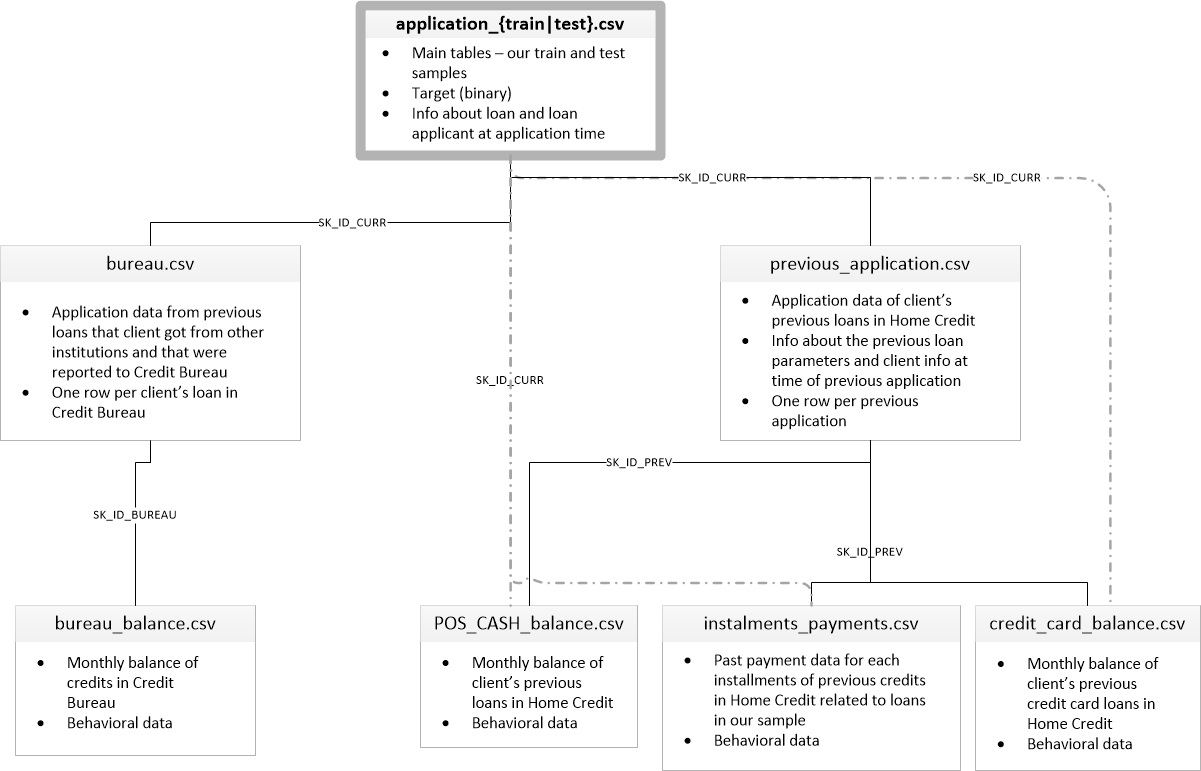

In [103]:
Image('Data_Description.jpg')

## 3. Loading Dataset Files
<a id="files"></a>

In [2]:
# Loading all the datasets provided on the competition
train = pd.read_csv('Datasets/application_train.csv')
test = pd.read_csv('Datasets/application_test.csv')
bureau = pd.read_csv('Datasets/bureau.csv')
bureau_balance = pd.read_csv('Datasets/bureau_balance.csv')
credit_card_balance = pd.read_csv('Datasets/credit_card_balance.csv')
installments_payments = pd.read_csv('Datasets/installments_payments.csv')
pos_cash_balance = pd.read_csv('Datasets/POS_CASH_balance.csv')
previous_application = pd.read_csv('Datasets/previous_application.csv')

## 4. Exploratory Data Analysis - EDA
<a id="eda"></a>

### 4.1 Evaluating TRAIN dataset
<a id="train"></a>

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### How many clients with payment difficulties?

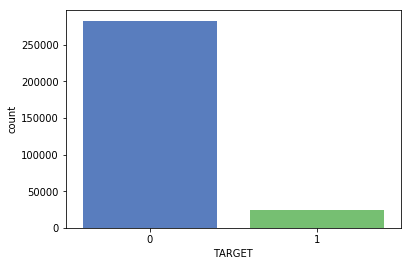

In [5]:
# Ploting how many clients with payment difficulties on the train dataset
graph = sns.countplot(x="TARGET",data=train, palette='muted')

In [6]:
# Calculating how many clients with payment difficulties on the train dataset
pay_diff = train[train['TARGET'] == 1]['TARGET'].count()
pay_ok = train[train['TARGET'] == 0]['TARGET'].count()
print('Clients with payment difficulty: %s' % pay_diff)
print('Clients with payment ok: %s' % pay_ok)

Clients with payment difficulty: 24825
Clients with payment ok: 282686


8% of the clients are not trustable for a loan

### Correlation between numerical values in the TRAIN dataset

In [7]:
# Selecting only the numerical features in the Train dataset
numerical_features = train[['TARGET', 'SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                            'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                            'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                            'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 
                            'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 
                            'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 
                            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                            'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                            'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                            'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                            'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                            'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                            'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                            'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                            'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                            'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                            'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                            'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                            'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                            'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
                            'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                            'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                            'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                            'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                            'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                            'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                            'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                            'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                            'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                            'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                            'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [8]:
# Calculating the corelation between numerical features and the TARGET on the training dataset
corelation = numerical_features.corr()['TARGET']

In [9]:
# Sorting the correlation to check wich feature is better correlated with the TARGET 
corelation.abs().sort_values(ascending = False)[0:10]

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

Seems that only the 3 Ext_Source features have a high corelation with the target features and we don't know nothing about them. Better explore the other datasets.

### 4.2 Evaluating BUREAU dataset
<a id="bureau"></a>

In [10]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### How many previous credit loans the clients have in other institutions?

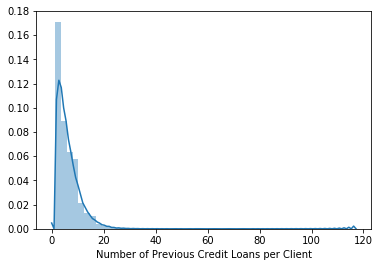

In [12]:
# Ploting the histogram of the previous client accounts in other institutions
bureau_account = bureau['SK_ID_BUREAU'].groupby(bureau['SK_ID_CURR'])
bureau_account_n = bureau_account.count()
graph = sns.distplot(bureau_account_n)
graph.set_xlabel("Number of Previous Credit Loans per Client")

In [13]:
# Describing the stats of the graph
bureau_account_n.describe()

count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: SK_ID_BUREAU, dtype: float64

Most of the clients have 4 previous credit loans in other institutions, but some of them have more than 100.

### How many active previous credit loans the clients have in other institutions?

In [14]:
# Selecting only clients with active credit loans accounts on the Bureau dataset
active_account = bureau[['SK_ID_CURR', 'CREDIT_ACTIVE']]
bureau_active_account = active_account[active_account['CREDIT_ACTIVE'] == 'Active']
bureau_active_account_n = bureau_active_account['CREDIT_ACTIVE'].groupby(bureau_active_account['SK_ID_CURR']).count()

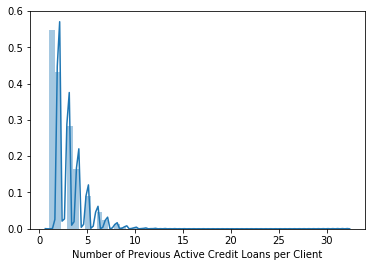

In [15]:
# Ploting the histogram of the clients with active credit loans accounts
graph = sns.distplot(bureau_active_account_n)
graph.set_xlabel("Number of Previous Active Credit Loans per Client")

In [16]:
# Describing the stats of the graph
bureau_active_account_n.describe()

count    251815.000000
mean          2.504247
std           1.670734
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          32.000000
Name: CREDIT_ACTIVE, dtype: float64

Most of the clients have 2 previous active credit loans in other institutions, but some of them have more than 30.

### What is the debt amount that clients have on previous credit loans in onther institutions?

In [17]:
# Checking for null values on the debt amount feature
print('There are %i accounts with null debt amount' %bureau['AMT_CREDIT_SUM_DEBT'].isnull().sum())

There are 257669 accounts with null debt amount


In [18]:
# Elimitating null values to better visualize the data and grouping by client SK_ID_CURR
bureau_client_debt = bureau[['AMT_CREDIT_SUM_DEBT', 'SK_ID_CURR']]
bureau_client_debt = bureau_client_debt[bureau_client_debt['AMT_CREDIT_SUM_DEBT'].notnull()]
bureau_client_debt_amount = bureau_client_debt.groupby(bureau_client_debt['SK_ID_CURR']).sum()

In [19]:
# Defining bins to better visualize the current debt per client
# Low debt is less than $100
# Medium debt is between $100 and $1.000
# Medium high debt is between $1.000 and $10.000
# High debt is bigger than $10.000
def amount_bins_debt(amount):
    if amount < 10000:
        amount = 'Low'
    else: 
        if amount > 10000 and amount < 100000:
            amount = 'Medium'
        else: 
            if amount > 100000 and amount < 1000000:
                amount = 'Medium High'
            else:
                amount = 'High'
    return amount

In [20]:
# Transforming the total debt amount in bin sizes
bureau_client_debt_bins = bureau_client_debt_amount['AMT_CREDIT_SUM_DEBT'].apply(amount_bins_debt)

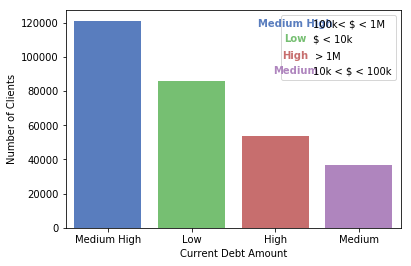

In [21]:
# Ploting the current debt amount per client on all previous accounts
graph = sns.countplot(bureau_client_debt_bins, palette='muted')
graph.set_xlabel("Current Debt Amount")
graph.set_ylabel("Number of Clients")

# Everything below is to put a legend in the graph
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
    
handltext = ["Low", "Medium", "Medium High", "High"]
labels = ["$ < 10k", "10k < $ < 100k", "100k< $ < 1M", "$ > $1M"]


t = graph.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,graph.patches)]

graph.legend(handles, labels, handler_map={tuple : TextHandler()})

40% of the clients have a sum of debts on previous accounts on other institutions between \$100.000 and \$1.000.000 and 16% have more than \$1.000.000

### How many clients are overdue with previous credit loans in onther institutions?

Due Clients: 305650
Overdue Clients: 3864


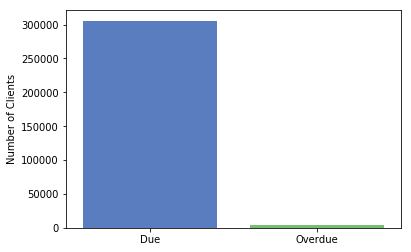

In [22]:
# Selecting due and overdue clients
bureau_due = bureau[bureau['CREDIT_DAY_OVERDUE'] == 0]
bureau_due = bureau_due[['SK_ID_CURR', 'CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE']]
bureau_due_n = len(bureau_due['SK_ID_CURR'].unique())
bureau_overdue = bureau[bureau['CREDIT_DAY_OVERDUE'] != 0]
bureau_overdue = bureau_overdue[['SK_ID_CURR', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE']]
bureau_overdue_n = len(bureau_overdue['SK_ID_CURR'].unique())

# Ploting the result
graph = sns.barplot(x=['Due', 'Overdue'],y=[bureau_due_n, bureau_overdue_n], palette= 'muted')
graph.set_ylabel("Number of Clients")
print('Due Clients: %s\nOverdue Clients: %s' %(bureau_due_n, bureau_overdue_n))

Less than 2% of the clients are overdue with previous credit loans at other institution.
There are 2.003 different clients in the Bureau dataset that are not in the Train dataset.

### What is the maximum days past due of clients with previous credit loans in onther institutions?

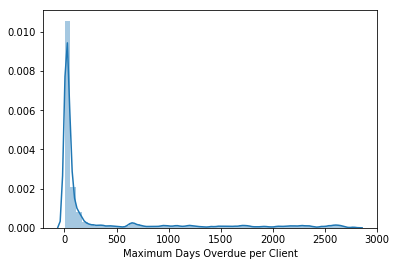

In [23]:
# Ploting the maximum days overdue of the clients
bureau_max_client_overdue = bureau_overdue['CREDIT_DAY_OVERDUE'].groupby(bureau_overdue['SK_ID_CURR']).max()
graph = sns.distplot(bureau_max_client_overdue)
graph.set_xlabel("Maximum Days Overdue per Client")

In [24]:
# Describing the stats of the graph
bureau_max_client_overdue.describe()

count    3864.000000
mean      351.130952
std       676.710897
min         1.000000
25%        18.000000
50%        35.000000
75%       161.000000
max      2792.000000
Name: CREDIT_DAY_OVERDUE, dtype: float64

Most of the 3.864 clients are 35 days overdue but the mean value is 351 days overdue. We can explain that because of a small number of clients that are a few thousand days overdue and move the average to a bigger value.

### What is the current amount past due of clients with previous credit loans in other institutions?

In [25]:
# Defining bins to better visualize the current amount past due per client
# Low overdue is less than $100
# Medium overdue is between $100 and $1.000
# Medium high overdue is between $1.000 and $10.000
# High overdue is bigger than $10.000
def amount_bins_overdue(overdue):
    if overdue < 100:
        overdue = 'Low'
    else: 
        if overdue > 100 and overdue < 1000:
            overdue = 'Medium'
        else: 
            if overdue > 1000 and overdue < 10000:
                overdue = 'Medium High'
            else:
                overdue = 'High'
    return overdue

In [26]:
# Calculating the total current amount overdue per client
bureau_amount_overdue = bureau_overdue['AMT_CREDIT_SUM_OVERDUE'].groupby(bureau_overdue['SK_ID_CURR'])
bureau_sum_amount_overdue = bureau_amount_overdue.sum()

# Transforming the total amount in bin sizes
bureau_sum_amount_overdue_bins = bureau_sum_amount_overdue.apply(amount_bins_overdue)

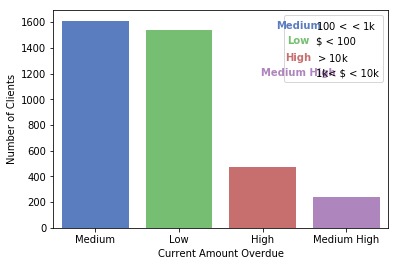

In [27]:
# Ploting the current amount overdue per client
graph = sns.countplot(bureau_sum_amount_overdue_bins, palette='muted')
graph.set_xlabel("Current Amount Overdue")
graph.set_ylabel("Number of Clients")

# Everything below is to put a legend in the graph
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
    
handltext = ["Low", "Medium", "Medium High", "High"]
labels = ["$ < 100", "100 < $ < $1k", "1k< $ < 10k", "$ > $10k"]


t = graph.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,graph.patches)]

graph.legend(handles, labels, handler_map={tuple : TextHandler()})

Most of the clients are less than \$1.000 overdue, but at least 500 clients are more than \$10.000 overdue.

### How many times clients prolonged credit in previous credit loans in onther institutions?

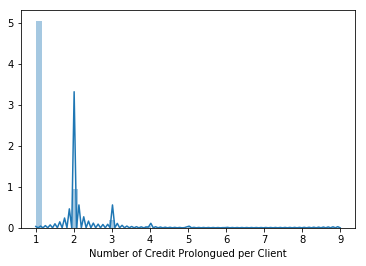

In [28]:
# Ploting the number of times credit was prolonged per client in all previous loan credit accounts
credit_prolong=bureau[bureau['CNT_CREDIT_PROLONG'] > 0]
bureau_credit_prolong_client = credit_prolong['CNT_CREDIT_PROLONG'].groupby(credit_prolong['SK_ID_CURR'])
bureau_credit_prolong_client_n = bureau_credit_prolong_client.sum()
graph = sns.distplot(bureau_credit_prolong_client_n)
graph.set_xlabel("Number of Credit Prolongued per Client")

In [29]:
# Describing the stats of the graph
bureau_credit_prolong_client_n.describe()

count    8796.000000
mean        1.250910
std         0.605756
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: CNT_CREDIT_PROLONG, dtype: float64

Only 3% of the clients have prolonged credit on previous accounts. Most of them have prolonged only once but there are clients that prolonged credit 9 times.

### 4.3 Evaluating PREVIOUS_APPLICATION dataset
<a id="previous_application"></a>

In [30]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

### How many previous credit loans the clients have in Home Credit?

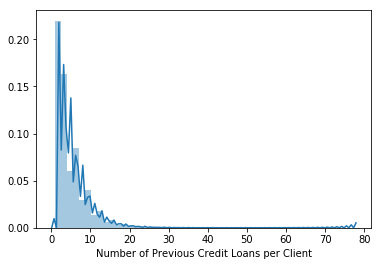

In [32]:
# Ploting the histogram of the number of previous client accounts in Home Credit
prev_app_acc_n = previous_application['SK_ID_PREV'].groupby(previous_application['SK_ID_CURR']).count()
graph = sns.distplot(prev_app_acc_n)
graph.set_xlabel("Number of Previous Credit Loans per Client")

In [33]:
# Describing the stats of the graph
prev_app_acc_n.describe()

count    338857.000000
mean          4.928964
std           4.220716
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          77.000000
Name: SK_ID_PREV, dtype: float64

Most of the clients have 4 previous credit loans in Home Credit, but some of them have more than 100.

### Which are the top 5 purpose of previous credit on Home Credit?

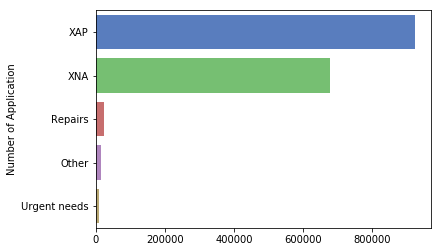

In [34]:
# Grouping, sorting and selecting the top five credit purpose
most_common_purpose = previous_application['SK_ID_PREV'].groupby(previous_application['NAME_CASH_LOAN_PURPOSE'])
most_common_purpose = most_common_purpose.count().sort_values(ascending = False)[0:5]

# Ploting the top five purpose of previous credit
graph = sns.barplot(y=most_common_purpose.index,x=most_common_purpose.values, palette= 'muted', orient = 'h')
graph.set_ylabel("Number of Application")

96% of the previous application was for the XAP and XNA purpose. I don`t actually know what that mean.

### What is the status of previous applications on Home Credit?

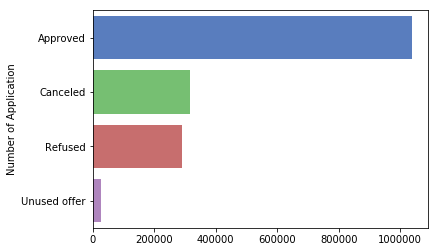

In [35]:
application_status = previous_application['SK_ID_PREV'].groupby(previous_application['NAME_CONTRACT_STATUS']).count()

# Ploting the top five purpose of previous credit
graph = sns.barplot(y=application_status.index,x=application_status.values, palette= 'muted', orient = 'h')
graph.set_ylabel("Number of Application")

62% of previous applications on Home Credit are approved, 18% are cancelled and 17% are refused.

### How many previous refused applications clients have on Home Credit?

In [36]:
# Filtering the previous application with only refused previous applications
refused_application = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']

Total Clients With Previous Applications: 338857
Total Clients With Refused Previous Application : 118277
Percentage of Clients With Refuse Previous Applications: 34.90 %


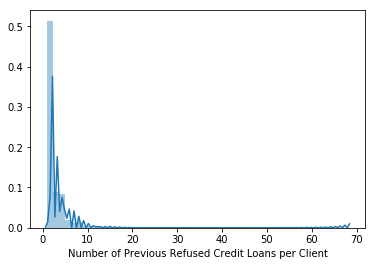

In [37]:
# Printing the number and percentage of clients with previous refused applications
client_refused_n = len(refused_application['SK_ID_CURR'].unique())
client_total_n = len(previous_application['SK_ID_CURR'].unique())
print('Total Clients With Previous Applications: %s\nTotal Clients With Refused Previous Application : %s'
      %(client_total_n, client_refused_n))
print('Percentage of Clients With Refuse Previous Applications: %2.2f %%'%((client_refused_n/client_total_n)*100))

# Ploting the histogram of the number of refused previous client accounts in Home Credit
prev_app_refused_n = refused_application['SK_ID_PREV'].groupby(refused_application['SK_ID_CURR']).count()
graph = sns.distplot(prev_app_refused_n)
graph.set_xlabel("Number of Previous Refused Credit Loans per Client")

In [38]:
# Describing the stats of the graph
prev_app_refused_n.describe()

count    118277.000000
mean          2.457604
std           2.380927
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          68.000000
Name: SK_ID_PREV, dtype: float64

Most of the clients with refused application have 2 refused credit applications on Home Credit but some of them have more than 60.

### 4.4 Evaluating Instalment Payment dataset
<a id="instalment"></a>

In [39]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [40]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


### How many clients delayed with installment payment on previous Home Credit applications?

In [41]:
# Filtering the installment days
day_payment = installments_payments[['SK_ID_PREV', 'SK_ID_CURR', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT']]

# Filling missing payment with 0 value
day_payment = day_payment.fillna(0)

# Creating a new column with the diference between payment days and installment days
day_payment['DELAYED'] = day_payment['DAYS_ENTRY_PAYMENT'] - day_payment['DAYS_INSTALMENT']
day_payment.head()

,SK_ID_PREV,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,DELAYED
0,1054186,161674,-1180.0,-1187.0,-7.0
1,1330831,151639,-2156.0,-2156.0,0.0
2,2085231,193053,-63.0,-63.0,0.0
3,2452527,199697,-2418.0,-2426.0,-8.0
4,2714724,167756,-1383.0,-1366.0,17.0


Not_Delayed_Clients: 330456
Delayed_Clients: 9131


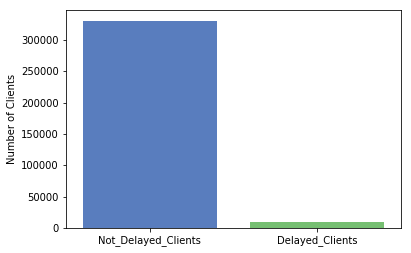

In [42]:
# Counting clients that delayed or not the payment
inst_paym_delayed_clients = day_payment['DELAYED'].groupby(day_payment['SK_ID_CURR']).sum()
inst_paym_delayed_clients_n = (inst_paym_delayed_clients.values > 0).sum()
inst_paym_not_delayed_clients_n = (inst_paym_delayed_clients.values <= 0).sum()

# Ploting the result
graph = sns.barplot(x=['Not_Delayed_Clients', 'Delayed_Clients'],y=[inst_paym_not_delayed_clients_n, 
                                                                    inst_paym_delayed_clients_n], palette= 'muted')
graph.set_ylabel("Number of Clients")
print('Not_Delayed_Clients: %s\nDelayed_Clients: %s' %(inst_paym_not_delayed_clients_n, inst_paym_delayed_clients_n))

Only 3% of the clients have delayed at least one payment of instalments on previous application in Home Credit.

### How many clients are in debt with instalments in previous Home Credit applications?

In [43]:
# Filtering the installment payment
amt_payment = installments_payments[['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER', 
                                        'AMT_INSTALMENT', 'AMT_PAYMENT']]

# Filling missing payment with 0 value
amt_payment = amt_payment.fillna(0)

# Calculating the debt in each installment
debt_instalment = amt_payment['AMT_PAYMENT'] - amt_payment['AMT_INSTALMENT']

# Creating a new debt colunm on amount_payment
amt_payment['AMT_DEBT'] = debt_instalment
amt_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_NUMBER,AMT_INSTALMENT,AMT_PAYMENT,AMT_DEBT
0,1054186,161674,6,6948.360,6948.360,0.000
1,1330831,151639,34,1716.525,1716.525,0.000
2,2085231,193053,1,25425.000,25425.000,0.000
3,2452527,199697,3,24350.130,24350.130,0.000
4,2714724,167756,2,2165.040,2160.585,-4.455


With Installment Debt Clients: 128420
Without Installment Debt Clients: 211167


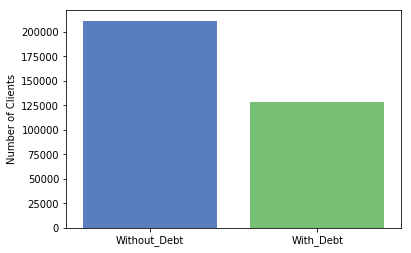

In [44]:
# Calculating the total debt per client
inst_paym_debt_client = amt_payment['AMT_DEBT'].groupby(amt_payment['SK_ID_CURR']).sum()
with_debt_client_n = (inst_paym_debt_client.values < 0).sum()
without_debt_client_n = (inst_paym_debt_client.values >= 0).sum()

# Ploting the result
graph = sns.barplot(x=['Without_Debt', 'With_Debt'],y=[without_debt_client_n, with_debt_client_n], palette= 'muted')
graph.set_ylabel("Number of Clients")
print('With Installment Debt Clients: %s\nWithout Installment Debt Clients: %s' %(with_debt_client_n, 
                                                                                   without_debt_client_n))

   37% of the clients are in debt with intalments in previous application in Home Credit.

### 4.5 Evaluating Credit Card Balance dataset
<a id="credit_card"></a>

In [45]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [46]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

### How much credit card debt clients have in previous Home Credit applications?

In [47]:
# selecting the credit card payment columns
amt_credit_payment = credit_card_balance[['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 
                                          'AMT_BALANCE','AMT_RECEIVABLE_PRINCIPAL']] 
                                          
# Filling missing payment with 0 value
amt_credit_payment = amt_credit_payment.fillna(0)

# Calculating the last month balance for each previous application
last_balance = pd.DataFrame(columns = ['SK_ID_PREV', 'MONTHS_BALANCE'])
last_balance['SK_ID_PREV'] = amt_credit_payment['MONTHS_BALANCE'].groupby(amt_credit_payment['SK_ID_PREV']).max().index
last_balance['MONTHS_BALANCE'] = amt_credit_payment['MONTHS_BALANCE'].groupby(amt_credit_payment['SK_ID_PREV']).max().values
last_balance = last_balance[['SK_ID_PREV', 'MONTHS_BALANCE']].apply(tuple, 1)

# Filtering only the last month balance
amt_credit_payment = amt_credit_payment[amt_credit_payment[['SK_ID_PREV', 'MONTHS_BALANCE']].apply(tuple, 1).isin(last_balance)]

# Creating a new debt colunm on amount_credit_payment
amt_credit_payment['AMT_DEBT'] = amt_credit_payment['AMT_RECEIVABLE_PRINCIPAL'] - amt_credit_payment['AMT_BALANCE']
amt_credit_payment.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_RECEIVABLE_PRINCIPAL,AMT_DEBT
1,2582071,363914,-1,63975.555,60175.080,-3800.475
4,1891521,126868,-1,453919.455,443044.395,-10875.060
11,2740914,340339,-1,131669.145,121430.700,-10238.445
14,1864742,303581,-1,0.000,0.000,0.000
15,2037377,289902,-1,131294.340,128518.020,-2776.320


With Credit Card Debt Clients: 35230
Without Credit Card Debt Clients: 68328


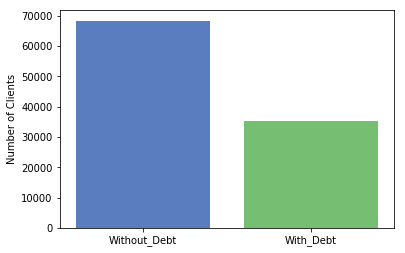

In [48]:
# Calculating the total debt per client
credit_card_debt_client = amt_credit_payment['AMT_DEBT'].groupby(amt_credit_payment['SK_ID_CURR']).sum()
with_credit_debt_client_n = (credit_card_debt_client.values < 0).sum()
without_credit_debt_client_n = (credit_card_debt_client.values >= 0).sum()

# Ploting the result
graph = sns.barplot(x=['Without_Debt', 'With_Debt'],y=[without_credit_debt_client_n, with_credit_debt_client_n], 
                    palette= 'muted')
graph.set_ylabel("Number of Clients")
print('With Credit Card Debt Clients: %s\nWithout Credit Card Debt Clients: %s' %(with_credit_debt_client_n, 
                                                                                   without_credit_debt_client_n))

   34% of the clients are in debt with the credit card in previous application in Home Credit.

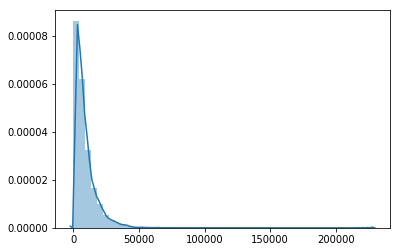

In [49]:
# Selecting only clients with credit card debit
debt = credit_card_debt_client.values
debt = debt[debt<0]
debt = debt * -1

# Ploting the amount of credit card debt 
graph = sns.distplot(debt)

In [50]:
# Descibing the stats of the graph
debt_df = pd.DataFrame(columns = ['Debt'])
debt_df['Debt'] = debt
debt_df.describe()

,Debt
count,35230.000000
mean,8300.858776
std,8319.332910
min,0.090000
25%,2798.448750
50%,5936.737500
75%,11032.537500
max,227274.210000


Most of the clients have a 5936,74 debt with credit card in previous applications in Home Credit, but some of them have more than 200.000,00 in debt.

### How many clients were overdue with credit card payment on previous Home Credit applications?

In [51]:
# Counting clients that delayed or not the payment
dpd_credit_card = credit_card_balance['SK_DPD'].groupby(credit_card_balance['SK_ID_CURR']).sum()
credit_overdue_clients_n = (dpd_credit_card.values > 0).sum()
credit_due_clients_n = (dpd_credit_card.values == 0).sum()

Due Credit Card Clients: 82898
Overdue Credit Card Clients: 20660


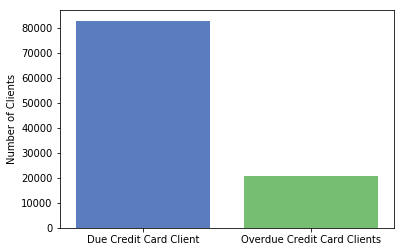

In [52]:
# Ploting the result
graph = sns.barplot(x=['Due Credit Card Client', 'Overdue Credit Card Clients'], 
                    y=[credit_due_clients_n, credit_overdue_clients_n], palette= 'muted')
graph.set_ylabel("Number of Clients")
print('Due Credit Card Clients: %s\nOverdue Credit Card Clients: %s' %(credit_due_clients_n, credit_overdue_clients_n))

   22% of the clients were overdue with credit card payment in previous application in Home Credit.

### 4.6 Evaluating Pos Cash Balance dataset
<a id="cash_balance"></a>

In [53]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [54]:
pos_cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


### How many clients were overdue with previous cash loans applications in Home Credit?

In [55]:
# Counting clients that are due and overdue with the cash loan
dpd_cash_loan = pos_cash_balance['SK_DPD'].groupby(pos_cash_balance['SK_ID_CURR']).sum()
cash_loan_overdue_clients_n = (dpd_cash_loan.values > 0).sum()
cash_loan_due_clients_n = (dpd_cash_loan.values == 0).sum()

Due Cash Loan Clients: 274268
Overdue Cash Loan Clients: 62984


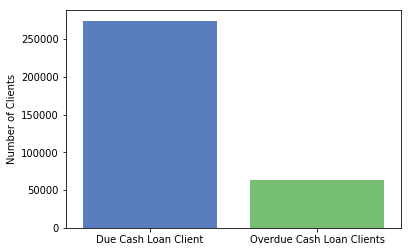

In [56]:
# Ploting the result
graph = sns.barplot(x=['Due Cash Loan Client', 'Overdue Cash Loan Clients'], 
                    y=[cash_loan_due_clients_n, cash_loan_overdue_clients_n], palette= 'muted')
graph.set_ylabel("Number of Clients")
print('Due Cash Loan Clients: %s\nOverdue Cash Loan Clients: %s' %(cash_loan_due_clients_n, cash_loan_overdue_clients_n))

   19% of the clients were overdue with cash loan payment in previous application in Home Credit.

## 5. Features Engineering
<a id="eng"></a>

In [85]:
# Creating a new train dataset with the new features from other datasets
new_train = numerical_features

In [86]:
# Joining with the new features from bureau dataset
# Number of previous loans in other institutions
new_train = new_train.join(bureau_account_n, on='SK_ID_CURR')
new_train.rename(columns={'SK_ID_BUREAU':'CNT_ACOUNTS_BUREAU'}, inplace=True)

# Number of previous active loans in other institutions
new_train = new_train.join(bureau_active_account_n, on='SK_ID_CURR')
new_train.rename(columns={'CREDIT_ACTIVE':'CNT_ACTIVE_ACOUNTS_BUREAU'}, inplace=True)

# Debt amount of previous loans in other institutions
new_train = new_train.join(bureau_client_debt_amount, on='SK_ID_CURR')
new_train.rename(columns={'AMT_CREDIT_SUM_DEBT':'AMT_CREDIT_DEBT_BUREAU'}, inplace=True)

# Days overdue of previous loans in other institutions
bureau_days_overdue_sum = bureau_overdue['CREDIT_DAY_OVERDUE'].groupby(bureau_overdue['SK_ID_CURR']).sum()
new_train = new_train.join(bureau_days_overdue_sum, on='SK_ID_CURR')
new_train.rename(columns={'CREDIT_DAY_OVERDUE':'CNT_DAYS_OVERDUE_BUREAU'}, inplace=True)

# Amount overdue of previous loans in other institutions
new_train = new_train.join(bureau_sum_amount_overdue, on='SK_ID_CURR')
new_train.rename(columns={'AMT_CREDIT_SUM_OVERDUE':'AMT_CREDIT_OVERDUE_BUREAU'}, inplace=True)

# Number of times credit was prolonged of previous loans in other institutions
new_train = new_train.join(bureau_credit_prolong_client_n, on='SK_ID_CURR')
new_train.rename(columns={'CREDIT_CREDIT_PROLONG':'CNT_DAYS_PROLONG_BUREAU'}, inplace=True)

In [87]:
# Joining with the new features from previous application dataset
# Number of previous loans in Home Credit
new_train = new_train.join(prev_app_acc_n, on='SK_ID_CURR')
new_train.rename(columns={'SK_ID_PREV':'CNT_ACOUNTS_HC'}, inplace=True)

# Number of refused previous loans in Home Credit
new_train = new_train.join(prev_app_refused_n, on='SK_ID_CURR')
new_train.rename(columns={'SK_ID_PREV':'CNT_REFUSED_HC'}, inplace=True)

In [88]:
# Joining with the new features from instalment payment dataset
# Number of delayed days of instalment payment in Home Credit
inst_paym_delayed_clients.values[inst_paym_delayed_clients.values < 0] = 0
new_train = new_train.join(inst_paym_delayed_clients, on='SK_ID_CURR')
new_train.rename(columns={'DELAYED':'CNT_DAYS_DELAYED_INSTALLMENT_HC'}, inplace=True)

# Amount of delayed instalment payment in Home Credit
inst_paym_debt_client.values[inst_paym_debt_client.values > 0] = 0
new_train = new_train.join(inst_paym_debt_client, on='SK_ID_CURR')
new_train.rename(columns={'AMT_DEBT':'AMT_DEBT_INSTALLMENT_HC'}, inplace=True)

In [89]:
# Joining with the new features from credit card balance dataset
# Amount of debt of credit card in Home Credit
credit_card_debt_client.values[credit_card_debt_client.values > 0] = 0
new_train = new_train.join(credit_card_debt_client, on='SK_ID_CURR')
new_train.rename(columns={'AMT_DEBT':'AMT_DEBT_CREDIT_CARD_HC'}, inplace=True)

# Number of days past due of credit card in Home Credit
new_train = new_train.join(dpd_credit_card, on='SK_ID_CURR')
new_train.rename(columns={'SK_DPD':'CNT_DPD_CREDIT_CARD_HC'}, inplace=True)

In [90]:
# Joining with the new features from pos cash balance dataset
# Number of days past due of pos cash balance in Home Credit
new_train = new_train.join(dpd_cash_loan, on='SK_ID_CURR')
new_train.rename(columns={'SK_DPD':'CNT_DPD_CASH_LOAN_HC'}, inplace=True)

## 5. Missing Values
<a id="missing"></a>

In [91]:
# Dealing with missing values
# Filling the new engineered missing values with zero
new_train[new_train.columns[106 :]] = new_train[new_train.columns[106 :]].fillna(0)

In [96]:
# Filling the numerical missing values with mean value
new_train = new_train.fillna(new_train.mean())

## 6. Dimensonality Reduction - Primary Component Analysis - PCA
<a id="pca"></a>

In [97]:
# Spliting the new_train into features X and target Y components
y_train = new_train['TARGET']
X_train = new_train.drop(['TARGET'], axis=1)

In [98]:
# Standardizing all the features to a normal distribution 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [99]:
# Using PCA from silkit learn
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

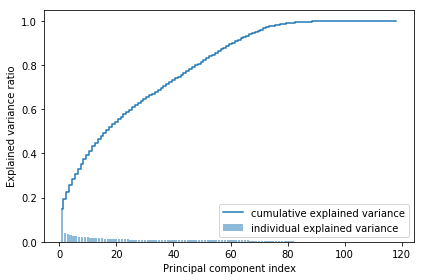

In [100]:
# Ploting the individual and cumulative explained variance of the features
plt.bar(range(1, (len(pca.explained_variance_ratio_) +1)), pca.explained_variance_ratio_, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, (len(pca.explained_variance_ratio_) +1)), np.cumsum(pca.explained_variance_ratio_), where='mid', 
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The individual values of the explained variance are realy small, so we will need at least 40 features to explain 70% of the cumulative variance. 

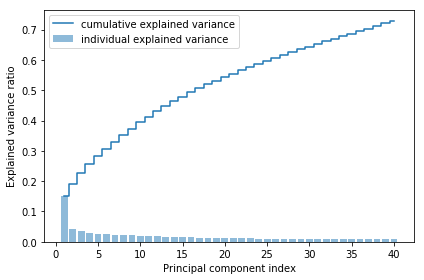

In [101]:
# Ploting the result of the cumulative variance with 40 features
pca = PCA(n_components= 40)
X_train_pca = pca.fit_transform(X_train_std)

# Ploting the individual and cumulative explained variance of the features
plt.bar(range(1, 41), pca.explained_variance_ratio_, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, 41), np.cumsum(pca.explained_variance_ratio_), where='mid', 
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 6. Conclusion and Next Steps
<a id="conclusion"></a>

My objective with this notebook was to show how to explore and analyze data to get ready for modeling. There are many other tools and procedures that can be used to get even more insights from the data, but a choose a few that are very common in data science projects.

The next step will be modeling and evaluating to check if more analysis should be done to get a better accuracy of the training predictions.

I would appreciate a collaborative approach of the community with comments and suggestion to this study. 
